In [1]:
import pandas as pd

In [2]:
Jan = pd.read_csv('Sales_January_2019.csv')
Feb = pd.read_csv('Sales_February_2019.csv')
March = pd.read_csv('Sales_March_2019.csv')
April = pd.read_csv('Sales_April_2019.csv')
May = pd.read_csv('Sales_May_2019.csv')
June = pd.read_csv('Sales_June_2019.csv')
July = pd.read_csv('Sales_July_2019.csv')
Aug = pd.read_csv('Sales_August_2019.csv')
Sep = pd.read_csv('Sales_September_2019.csv')
Oct = pd.read_csv('Sales_October_2019.csv')
Nov = pd.read_csv('Sales_November_2019.csv')
Dec = pd.read_csv('Sales_December_2019.csv')

In [3]:
Total_sales = [Jan,Feb,March,April,May,June,July,Aug,Sep,Oct,Nov,Dec]
sales = pd.concat(Total_sales)

In [4]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186850 entries, 0 to 25116
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 10.0+ MB


In [5]:
sales.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,186305,186305,186305,186305,186305,186305
unique,178438,20,10,24,142396,140788
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,355,21903,168552,21903,355,355


In [6]:
sales.shape

(186850, 6)

# Which Month Had the most sales


Cleaning the data

In [7]:
sales.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [8]:
sales = sales.dropna(how='all')
sales

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
25112,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016"
25113,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001"
25114,319668,Vareebadd Phone,1,400,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101"
25115,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001"


In [9]:
sales.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

Adding a months column 

In [10]:
sales['Month'] = sales['Order Date'].str[0:2]
sales

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",01
...,...,...,...,...,...,...,...
25112,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016",12
25113,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001",12
25114,319668,Vareebadd Phone,1,400,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101",12
25115,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001",12


In [11]:
sales['Month'].astype('int32')

ValueError: invalid literal for int() with base 10: 'Or'

In [12]:
sales = sales[sales['Month'] !='Or']
sales

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",01
...,...,...,...,...,...,...,...
25112,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016",12
25113,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001",12
25114,319668,Vareebadd Phone,1,400,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101",12
25115,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001",12


In [13]:
sales['Month'].astype('int32')

0         1
1         1
2         1
3         1
4         1
         ..
25112    12
25113    12
25114    12
25115    12
25116    12
Name: Month, Length: 185950, dtype: int32

Creating a total sales column 

In [14]:
sales['Total_sales'] = sales['Quantity Ordered'] * sales['Price Each']
sales

TypeError: can't multiply sequence by non-int of type 'str'

Changing the quantity ordered and price columns to integers

In [15]:
sales['Quantity Ordered'] = pd.to_numeric(sales['Quantity Ordered'])
sales['Price Each'] = pd.to_numeric(sales['Price Each'])


C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [16]:
sales['Total_sales'] = sales['Quantity Ordered'] * sales['Price Each']
sales

C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total_sales
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01,700.00
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01,14.95
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01,23.98
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01,149.99
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",01,11.99
...,...,...,...,...,...,...,...,...
25112,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016",12,14.95
25113,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001",12,7.68
25114,319668,Vareebadd Phone,1,400.00,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101",12,400.00
25115,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001",12,11.99


Grouping the sales for each month 

In [17]:
totals = sales.groupby('Month').sum()
totals

,Quantity Ordered,Price Each,Total_sales
Month,,,
01,10903,1.811768e+06,1.822257e+06
02,13449,2.188885e+06,2.202022e+06
03,17005,2.791208e+06,2.807100e+06
04,20558,3.367671e+06,3.390670e+06
05,18667,3.135125e+06,3.152607e+06
06,15253,2.562026e+06,2.577802e+06
07,16072,2.632540e+06,2.647776e+06
08,13448,2.230345e+06,2.244468e+06
09,13109,2.084992e+06,2.097560e+06


December had the most sales

Plotting monthly sales 

In [18]:
from matplotlib import pyplot as plt

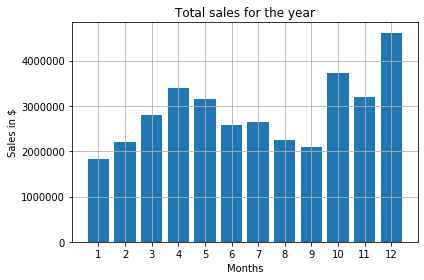

In [19]:
months = range(1,13)

plt.bar(months, totals['Total_sales'])
plt.title('Total sales for the year')
plt.xlabel('Months')
plt.ylabel('Sales in $')
plt.grid()
plt.xticks(months)
plt.tight_layout()


plt.show()

# WHICH CITY HAD THE MOST SALES

In [20]:
sales

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total_sales
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01,700.00
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01,14.95
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01,23.98
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01,149.99
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",01,11.99
...,...,...,...,...,...,...,...,...
25112,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016",12,14.95
25113,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001",12,7.68
25114,319668,Vareebadd Phone,1,400.00,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101",12,400.00
25115,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001",12,11.99


In [21]:
sales['Purchase Address'].apply (lambda x:x.split(',')[1] + ' (' + x.split(',')[2].split(' ')[1]+ ')')

0                Boston (MA)
1              Portland (OR)
2         San Francisco (CA)
3           Los Angeles (CA)
4                Austin (TX)
                ...         
25112     San Francisco (CA)
25113       Los Angeles (CA)
25114           Seattle (WA)
25115            Dallas (TX)
25116       Los Angeles (CA)
Name: Purchase Address, Length: 185950, dtype: object

In [22]:
sales['City'] = sales['Purchase Address'].apply (lambda x:x.split(',')[1] + ' (' + x.split(',')[2].split(' ')[1]+ ')')
sales

C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total_sales,City
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01,700.00,Boston (MA)
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01,14.95,Portland (OR)
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01,23.98,San Francisco (CA)
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01,149.99,Los Angeles (CA)
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",01,11.99,Austin (TX)
...,...,...,...,...,...,...,...,...,...
25112,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016",12,14.95,San Francisco (CA)
25113,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001",12,7.68,Los Angeles (CA)
25114,319668,Vareebadd Phone,1,400.00,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101",12,400.00,Seattle (WA)
25115,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001",12,11.99,Dallas (TX)


In [23]:
city_sales = sales.groupby('City').sum()
city_sales

,Quantity Ordered,Price Each,Total_sales
City,,,
Atlanta (GA),16602,2.779908e+06,2.795499e+06
Austin (TX),11153,1.809874e+06,1.819582e+06
Boston (MA),22528,3.637410e+06,3.661642e+06
Dallas (TX),16730,2.752628e+06,2.767975e+06
Los Angeles (CA),33289,5.421435e+06,5.452571e+06
New York City (NY),27932,4.635371e+06,4.664317e+06
Portland (ME),2750,4.471893e+05,4.497583e+05
Portland (OR),11303,1.860558e+06,1.870732e+06
San Francisco (CA),50239,8.211462e+06,8.262204e+06


San Francisco (CA) had the most sales

Plotting sales per city

In [24]:
sales['City'].unique()

array([' Boston (MA)', ' Portland (OR)', ' San Francisco (CA)',
       ' Los Angeles (CA)', ' Austin (TX)', ' Atlanta (GA)',
       ' Seattle (WA)', ' New York City (NY)', ' Dallas (TX)',
       ' Portland (ME)'], dtype=object)

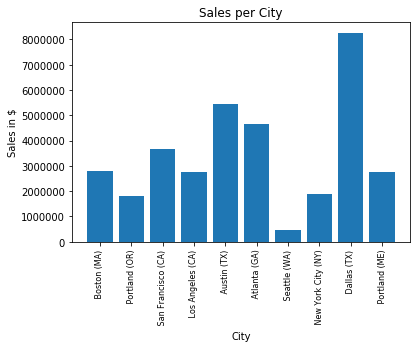

In [25]:
city = sales['City'].unique()

plt.bar(city, city_sales['Total_sales'])

plt.title('Sales per City')
plt.xlabel('City')
plt.ylabel('Sales in $')
plt.tight_layout()
plt.xticks(city, rotation='vertical', size=8)
plt.show()


The graph got an error because the cities are not in the same order as sales 

<function matplotlib.pyplot.show(*args, **kw)>

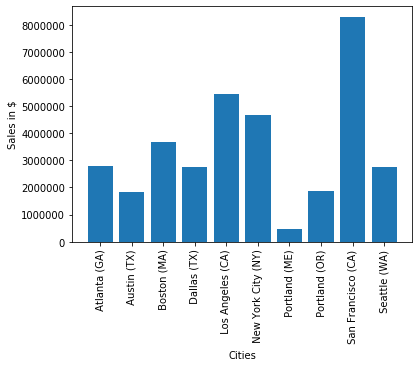

In [26]:
cities = [City for City, df in sales.groupby('City')]

plt.bar(cities, city_sales['Total_sales'])
plt.xlabel('Cities')
plt.ylabel('Sales in $')
plt.tight_layout()
plt.xticks(cities, rotation ='vertical', size=10)
plt.show




# What is the best time to advertise(Sales per hour)

In [27]:
sales

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total_sales,City
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01,700.00,Boston (MA)
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01,14.95,Portland (OR)
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01,23.98,San Francisco (CA)
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01,149.99,Los Angeles (CA)
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",01,11.99,Austin (TX)
...,...,...,...,...,...,...,...,...,...
25112,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016",12,14.95,San Francisco (CA)
25113,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001",12,7.68,Los Angeles (CA)
25114,319668,Vareebadd Phone,1,400.00,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101",12,400.00,Seattle (WA)
25115,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001",12,11.99,Dallas (TX)


In [28]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 25116
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185950 non-null  object 
 1   Product           185950 non-null  object 
 2   Quantity Ordered  185950 non-null  int64  
 3   Price Each        185950 non-null  float64
 4   Order Date        185950 non-null  object 
 5   Purchase Address  185950 non-null  object 
 6   Month             185950 non-null  object 
 7   Total_sales       185950 non-null  float64
 8   City              185950 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 14.2+ MB


In [29]:
#Converting the order date column to datetime formart 

sales['Order Date'] = pd.to_datetime(sales['Order Date'])



C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [30]:
sales

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total_sales,City
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",01,700.00,Boston (MA)
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",01,14.95,Portland (OR)
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",01,23.98,San Francisco (CA)
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",01,149.99,Los Angeles (CA)
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",01,11.99,Austin (TX)
...,...,...,...,...,...,...,...,...,...
25112,319666,Lightning Charging Cable,1,14.95,2019-12-11 20:58:00,"14 Madison St, San Francisco, CA 94016",12,14.95,San Francisco (CA)
25113,319667,AA Batteries (4-pack),2,3.84,2019-12-01 12:01:00,"549 Willow St, Los Angeles, CA 90001",12,7.68,Los Angeles (CA)
25114,319668,Vareebadd Phone,1,400.00,2019-12-09 06:43:00,"273 Wilson St, Seattle, WA 98101",12,400.00,Seattle (WA)
25115,319669,Wired Headphones,1,11.99,2019-12-03 10:39:00,"778 River St, Dallas, TX 75001",12,11.99,Dallas (TX)


In [31]:
sales['Hour']=sales['Order Date'].dt.hour
sales['Minute']=sales['Order Date'].dt.minute
sales

C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total_sales,City,Hour,Minute
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",01,700.00,Boston (MA),21,25
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",01,14.95,Portland (OR),14,15
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",01,23.98,San Francisco (CA),13,33
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",01,149.99,Los Angeles (CA),20,33
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",01,11.99,Austin (TX),11,59
...,...,...,...,...,...,...,...,...,...,...,...
25112,319666,Lightning Charging Cable,1,14.95,2019-12-11 20:58:00,"14 Madison St, San Francisco, CA 94016",12,14.95,San Francisco (CA),20,58
25113,319667,AA Batteries (4-pack),2,3.84,2019-12-01 12:01:00,"549 Willow St, Los Angeles, CA 90001",12,7.68,Los Angeles (CA),12,1
25114,319668,Vareebadd Phone,1,400.00,2019-12-09 06:43:00,"273 Wilson St, Seattle, WA 98101",12,400.00,Seattle (WA),6,43
25115,319669,Wired Headphones,1,11.99,2019-12-03 10:39:00,"778 River St, Dallas, TX 75001",12,11.99,Dallas (TX),10,39


In [32]:
sales.groupby('Hour').count()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total_sales,City,Minute
Hour,,,,,,,,,,
0,3910,3910,3910,3910,3910,3910,3910,3910,3910,3910
1,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350
2,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243
3,831,831,831,831,831,831,831,831,831,831
4,854,854,854,854,854,854,854,854,854,854
5,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321
6,2482,2482,2482,2482,2482,2482,2482,2482,2482,2482
7,4011,4011,4011,4011,4011,4011,4011,4011,4011,4011
8,6256,6256,6256,6256,6256,6256,6256,6256,6256,6256


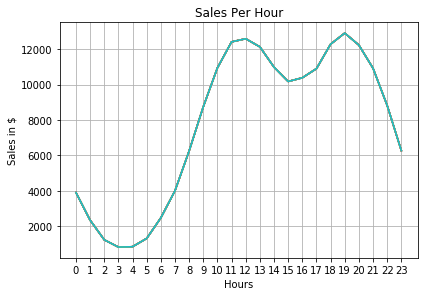

In [33]:
Hours = [hour for hour, df in sales.groupby('Hour')]


plt.plot(Hours, sales.groupby('Hour').count())
plt.xlabel('Hours')
plt.ylabel('Sales in $')
plt.tight_layout()
plt.title('Sales Per Hour')
plt.grid()
plt.xticks(Hours)
plt.show()



The sales are high in 11am and 7pm that's when the advertisments should be made

# What Products are most often sold together 

In [34]:
sales

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total_sales,City,Hour,Minute
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",01,700.00,Boston (MA),21,25
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",01,14.95,Portland (OR),14,15
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",01,23.98,San Francisco (CA),13,33
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",01,149.99,Los Angeles (CA),20,33
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",01,11.99,Austin (TX),11,59
...,...,...,...,...,...,...,...,...,...,...,...
25112,319666,Lightning Charging Cable,1,14.95,2019-12-11 20:58:00,"14 Madison St, San Francisco, CA 94016",12,14.95,San Francisco (CA),20,58
25113,319667,AA Batteries (4-pack),2,3.84,2019-12-01 12:01:00,"549 Willow St, Los Angeles, CA 90001",12,7.68,Los Angeles (CA),12,1
25114,319668,Vareebadd Phone,1,400.00,2019-12-09 06:43:00,"273 Wilson St, Seattle, WA 98101",12,400.00,Seattle (WA),6,43
25115,319669,Wired Headphones,1,11.99,2019-12-03 10:39:00,"778 River St, Dallas, TX 75001",12,11.99,Dallas (TX),10,39


In [35]:
# Grabing all duplicate order id
duplicates = sales[sales['Order ID'].duplicated(keep = False)]
duplicates

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total_sales,City,Hour,Minute
41,141275,USB-C Charging Cable,1,11.95,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",01,11.95,Austin (TX),16,6
42,141275,Wired Headphones,1,11.99,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",01,11.99,Austin (TX),16,6
57,141290,Apple Airpods Headphones,1,150.00,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",01,150.00,Los Angeles (CA),8,25
58,141290,AA Batteries (4-pack),3,3.84,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",01,11.52,Los Angeles (CA),8,25
133,141365,Vareebadd Phone,1,400.00,2019-01-10 11:19:00,"20 Dogwood St, New York City, NY 10001",01,400.00,New York City (NY),11,19
...,...,...,...,...,...,...,...,...,...,...,...
25028,319584,Wired Headphones,1,11.99,2019-12-11 00:30:00,"537 Sunset St, Portland, OR 97035",12,11.99,Portland (OR),0,30
25040,319596,iPhone,1,700.00,2019-12-01 08:44:00,"436 14th St, New York City, NY 10001",12,700.00,New York City (NY),8,44
25041,319596,Lightning Charging Cable,1,14.95,2019-12-01 08:44:00,"436 14th St, New York City, NY 10001",12,14.95,New York City (NY),8,44
25076,319631,34in Ultrawide Monitor,1,379.99,2019-12-17 22:35:00,"363 Highland St, Austin, TX 73301",12,379.99,Austin (TX),22,35


In [36]:
#Grouping the duplicated data using order id and creating a new column 

duplicates['Grouped']= duplicates.groupby('Order ID')['Product'].transform(lambda x: ', '.join(x))
duplicates


C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total_sales,City,Hour,Minute,Grouped
41,141275,USB-C Charging Cable,1,11.95,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",01,11.95,Austin (TX),16,6,"USB-C Charging Cable, Wired Headphones"
42,141275,Wired Headphones,1,11.99,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",01,11.99,Austin (TX),16,6,"USB-C Charging Cable, Wired Headphones"
57,141290,Apple Airpods Headphones,1,150.00,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",01,150.00,Los Angeles (CA),8,25,"Apple Airpods Headphones, AA Batteries (4-pack)"
58,141290,AA Batteries (4-pack),3,3.84,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",01,11.52,Los Angeles (CA),8,25,"Apple Airpods Headphones, AA Batteries (4-pack)"
133,141365,Vareebadd Phone,1,400.00,2019-01-10 11:19:00,"20 Dogwood St, New York City, NY 10001",01,400.00,New York City (NY),11,19,"Vareebadd Phone, Wired Headphones"
...,...,...,...,...,...,...,...,...,...,...,...,...
25028,319584,Wired Headphones,1,11.99,2019-12-11 00:30:00,"537 Sunset St, Portland, OR 97035",12,11.99,Portland (OR),0,30,"iPhone, Wired Headphones"
25040,319596,iPhone,1,700.00,2019-12-01 08:44:00,"436 14th St, New York City, NY 10001",12,700.00,New York City (NY),8,44,"iPhone, Lightning Charging Cable"
25041,319596,Lightning Charging Cable,1,14.95,2019-12-01 08:44:00,"436 14th St, New York City, NY 10001",12,14.95,New York City (NY),8,44,"iPhone, Lightning Charging Cable"
25076,319631,34in Ultrawide Monitor,1,379.99,2019-12-17 22:35:00,"363 Highland St, Austin, TX 73301",12,379.99,Austin (TX),22,35,"34in Ultrawide Monitor, Lightning Charging Cable"


In [37]:
# Dropping the same pairing in the orders i.e grouped column and order id 

df = duplicates[['Order ID', 'Grouped']].drop_duplicates()
df




,Order ID,Grouped
41,141275,"USB-C Charging Cable, Wired Headphones"
57,141290,"Apple Airpods Headphones, AA Batteries (4-pack)"
133,141365,"Vareebadd Phone, Wired Headphones"
153,141384,"Google Phone, USB-C Charging Cable"
220,141450,"Google Phone, Bose SoundSport Headphones"
...,...,...
24977,319536,"Macbook Pro Laptop, Wired Headphones"
24998,319556,"Google Phone, Wired Headphones"
25027,319584,"iPhone, Wired Headphones"
25040,319596,"iPhone, Lightning Charging Cable"


In [38]:
from itertools import combinations
from collections import Counter

In [39]:
count = Counter()

for row in df['Grouped']:
    rowlist = row.split(',')
    count.update(Counter(combinations(rowlist, 2)))
    
for key, value in count.most_common(10):
    print(key, value)


('iPhone', ' Lightning Charging Cable') 1005
('Google Phone', ' USB-C Charging Cable') 987
('iPhone', ' Wired Headphones') 447
('Google Phone', ' Wired Headphones') 414
('Vareebadd Phone', ' USB-C Charging Cable') 361
('iPhone', ' Apple Airpods Headphones') 360
('Google Phone', ' Bose SoundSport Headphones') 220
('Vareebadd Phone', ' Wired Headphones') 143
(' USB-C Charging Cable', ' Wired Headphones') 120
('Vareebadd Phone', ' Bose SoundSport Headphones') 80


# What products sold the most

In [40]:
sales

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total_sales,City,Hour,Minute
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",01,700.00,Boston (MA),21,25
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",01,14.95,Portland (OR),14,15
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",01,23.98,San Francisco (CA),13,33
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",01,149.99,Los Angeles (CA),20,33
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",01,11.99,Austin (TX),11,59
...,...,...,...,...,...,...,...,...,...,...,...
25112,319666,Lightning Charging Cable,1,14.95,2019-12-11 20:58:00,"14 Madison St, San Francisco, CA 94016",12,14.95,San Francisco (CA),20,58
25113,319667,AA Batteries (4-pack),2,3.84,2019-12-01 12:01:00,"549 Willow St, Los Angeles, CA 90001",12,7.68,Los Angeles (CA),12,1
25114,319668,Vareebadd Phone,1,400.00,2019-12-09 06:43:00,"273 Wilson St, Seattle, WA 98101",12,400.00,Seattle (WA),6,43
25115,319669,Wired Headphones,1,11.99,2019-12-03 10:39:00,"778 River St, Dallas, TX 75001",12,11.99,Dallas (TX),10,39


In [41]:
product_group = sales.groupby('Product')
product_group

In [42]:
quantity_ordered = product_group.sum()['Quantity Ordered']
quantity_ordered

Product
20in Monitor                   4129
27in 4K Gaming Monitor         6244
27in FHD Monitor               7550
34in Ultrawide Monitor         6199
AA Batteries (4-pack)         27635
AAA Batteries (4-pack)        31017
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
Flatscreen TV                  4819
Google Phone                   5532
LG Dryer                        646
LG Washing Machine              666
Lightning Charging Cable      23217
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
USB-C Charging Cable          23975
Vareebadd Phone                2068
Wired Headphones              20557
iPhone                         6849
Name: Quantity Ordered, dtype: int64

In [47]:
import numpy as np

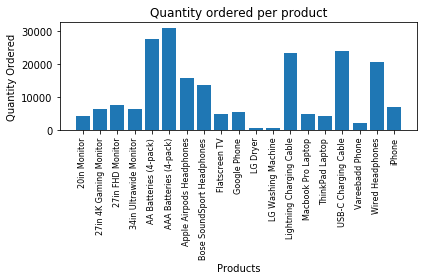

In [49]:
products = [p for p, df in product_group]

plt.bar(products, quantity_ordered )
plt.xlabel('Products')
plt.ylabel('Quantity Ordered')
plt.title('Quantity ordered per product')
plt.xticks(products, rotation='vertical', size=8)
plt.tight_layout()
plt.show()


